<a href="https://colab.research.google.com/github/shiguo-Feng/DogBreedScanner/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow
import tensorflow_hub as hub
from IPython.display import display, Image

## Preprocess Data
### read from csv -> filename and labels
* a list of all filename
* a list of unique breed name


### split into train/valid/test set

In [31]:
labels_csv = pd.read_csv("/content/drive/MyDrive/Doggy_data/labels.csv")
labels_csv.describe()
# labels_csv.head()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [13]:
filenames = []
for filename in labels_csv.id:
  filenames.append("/content/drive/MyDrive/Doggy_data/train/" + filename + ".jpg")

# filenames[:10]

In [17]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Doggy_data/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files")

Filenames match actual amount of files!


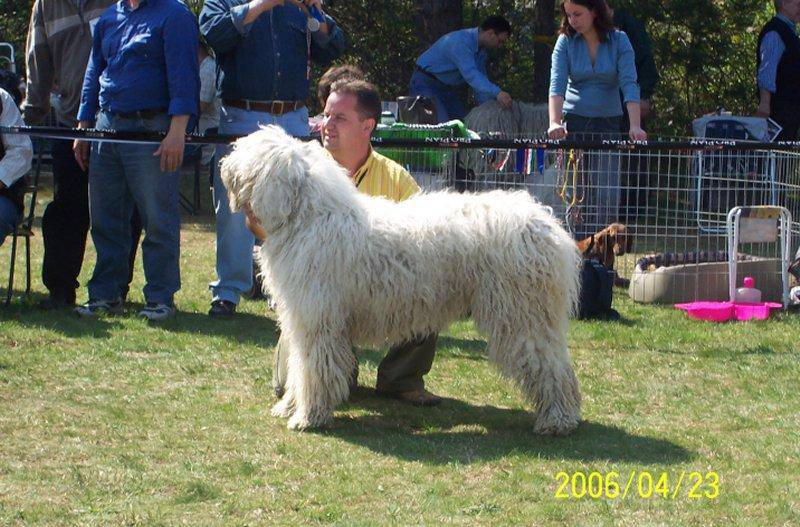

In [14]:
Image(filenames[101])

In [23]:
labels = labels_csv["breed"].to_numpy()
# check if every image has a label
if len(labels) == len(filenames):
   print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames")
unique_labels = np.unique(labels)

Number of labels matches number of filenames!


Turn into categorical array (one-hot vector)

In [35]:
one_hot_labels = [(label == np.array(unique_labels)).astype(int) for label in labels]

Split into train/valid

In [32]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10222, step:100}
NUM_IMAGES

1000

In [38]:
X = filenames
y = one_hot_labels
# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)